   target_moisture    fat  protein   carbs     ash  moisture  fiber
0            56.85  6.662  62.6988  20.491  4.2445    5.3937   0.51
1            56.85  6.662  62.6988  20.491  4.2445    5.3937   0.51
2            57.16  6.662  62.6988  20.491  4.2445    5.3937   0.51
3            57.51  6.582  63.1788  19.861  3.9545    5.9137   0.51
4            57.24  6.582  63.1788  19.861  3.9545    5.9137   0.51
   Chewiness
0  38.049816
1  31.294988
2  39.494747
3  26.862429
4  38.977081
[ 5  5  5  6  6  6  7  7  7  8  8  8  9  9  9 10 10 10 11 11 11 12 12 12
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  3  3  3  3  3  3  3
  3  3  4  4  4  4]
12


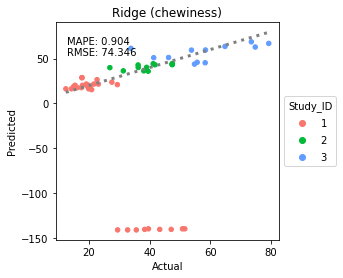

In [73]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeavePGroupsOut
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.feature_selection import f_regression#mutual_info_regression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import itertools
from sklearn.svm import SVR
from matplotlib import pyplot as plt
import numpy as np
import statsmodels.api as sm
import pylab as py
from sklearn.metrics import mean_absolute_percentage_error

data =pd.read_csv('./../Feature_Subsets/30_12_12.csv',header=0)#print(filtered_data.head())
features_all=data.iloc[:,1:8]
response = 'chewiness'

if response=='crosswise':
    X = np.array(features_all)
elif response=='lengthwise':
    X = np.array(features_all)
elif response=='chewiness':
    X = np.array(features_all)
    y = np.array(data.iloc[:,9:10])
    print(features_all.head())
    print(data.iloc[:,9:10].head())
elif response=='hardness':
    X = np.array(features_all)
    y = np.array(data.iloc[:,8:9])
    print(features_all.head())
    print(data.iloc[:,8:9].head())       
        
y_true, predictions, residuals = list(), list(), list()
loo = LeavePGroupsOut(n_groups=1)
groups = data.iloc[:,10:11].values.ravel()
study_id = data.iloc[:,0]
group_names= data.iloc[:,11:12].values.ravel()
print(groups)
k_fold=loo.get_n_splits(X,groups=groups)
print(k_fold)
grid = dict()
grid['sel__k'] = [i for i in range(1, X.shape[1]+1)]



g_mse, g_mae, g_rmse, g_r2, g_r2adj,g_mape = list(),list(),list(),list(),list(),list()
count=0
predictions_, y_trues_, residuals_ = list(), list(), list()
labels, labels2 = list(), list()
for train_index, test_index in loo.split(X,groups=groups):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    count += 1
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    labels.extend(study_id[test_index])
    labels2.extend(group_names[test_index])

   # scaler = StandardScaler()
   # y_train = scaler.fit_transform(y_train)
   # y_test = scaler.transform(y_test)

    reg = Ridge().fit(X_train, y_train.ravel())
    prediction = reg.predict(X_test)
    predictions_.extend(prediction)
    y_trues_.extend(y_test.ravel())

    residual =  y_test.ravel()-prediction
    residuals_.extend(residual)          


    pred = predictions_
    true = y_trues_



error3 = mean_squared_error(true, pred, squared=False)
error4 = mean_absolute_percentage_error(true, pred)
r2_score_val = r2_score(true, pred)
adj_R2=(1 - (1-r2_score_val)*(len(true)-1)/(len(true)-((7))-1))    


fig, ax = plt.subplots(figsize=(4,4))
plt.text(x=0.05,y=0.85,s='RMSE: %.3f' % error3, transform=ax.transAxes)
plt.text(x=0.05,y=0.90,s='MAPE: %.3f' % error4, transform=ax.transAxes)
#plt.text(x=0.05,y=0.95,s='Adjusted R2: %.3f' % adj_R2, transform=ax.transAxes)
#plt.text(x=0.05,y=0.90,s='R2: %.3f' % r2_score_val, transform=ax.transAxes)


plt.title('Ridge ('+response+')')
#ax.scatter(true, pred,labels)
colors = ListedColormap(['#F8766D','#00BA38','#619CFF'])

scatter=plt.scatter(true, pred,c=labels, cmap=colors,s=20)

true=np.array(true)

ax.plot([true.min(), true.max()], [true.min(), true.max()], linestyle = 'dotted', lw=3, color='gray')
ax.legend(*scatter.legend_elements(),title="Study_ID", loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

plt.show()





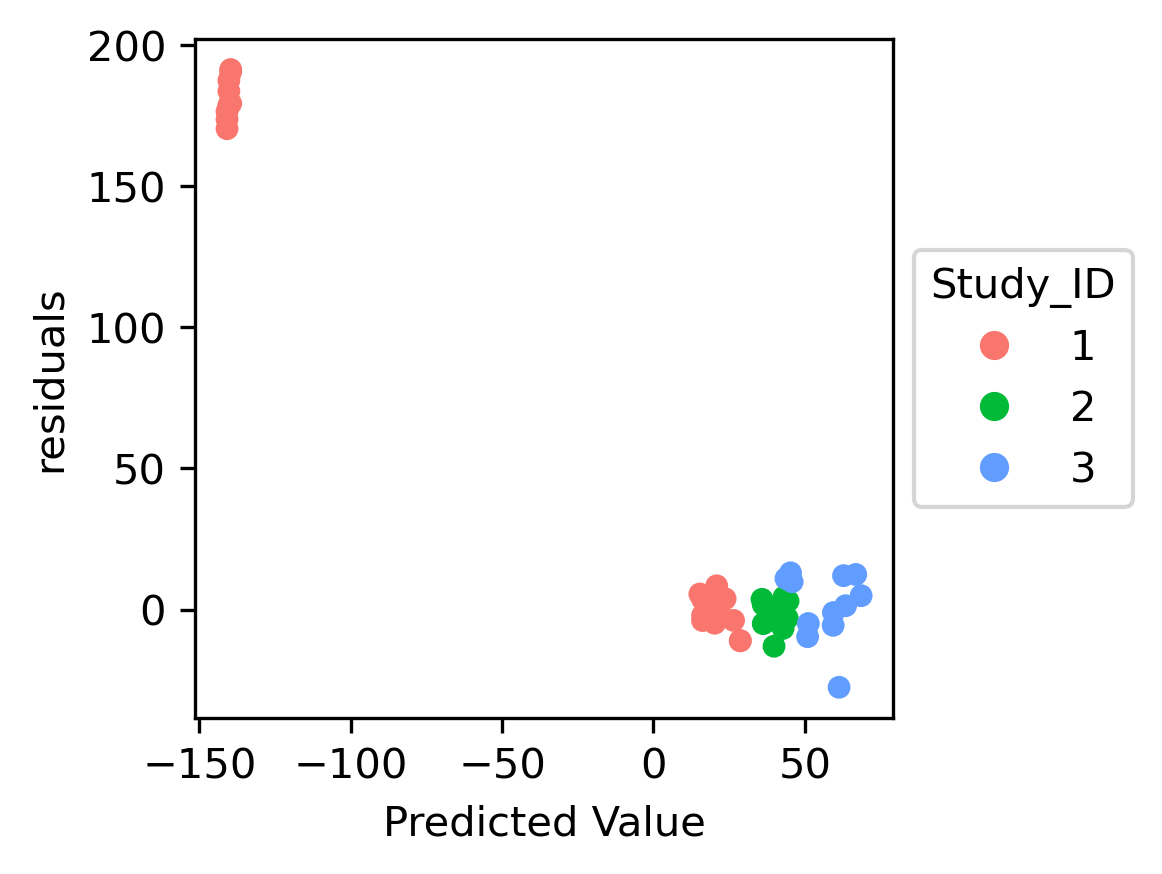

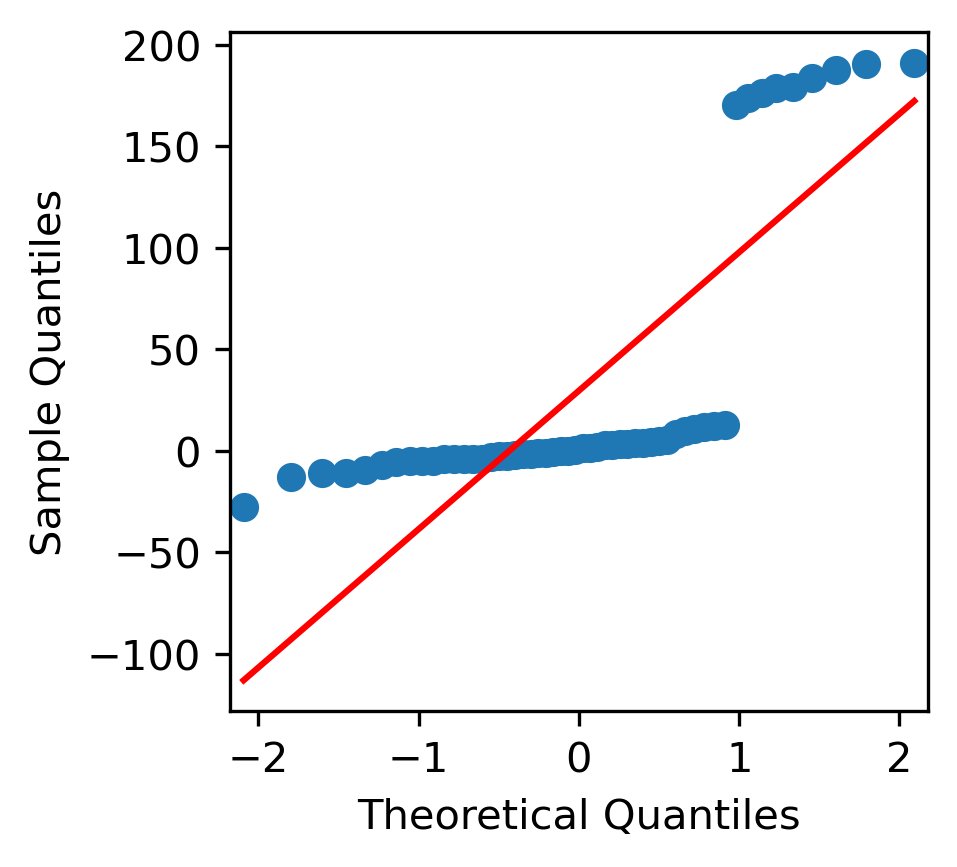

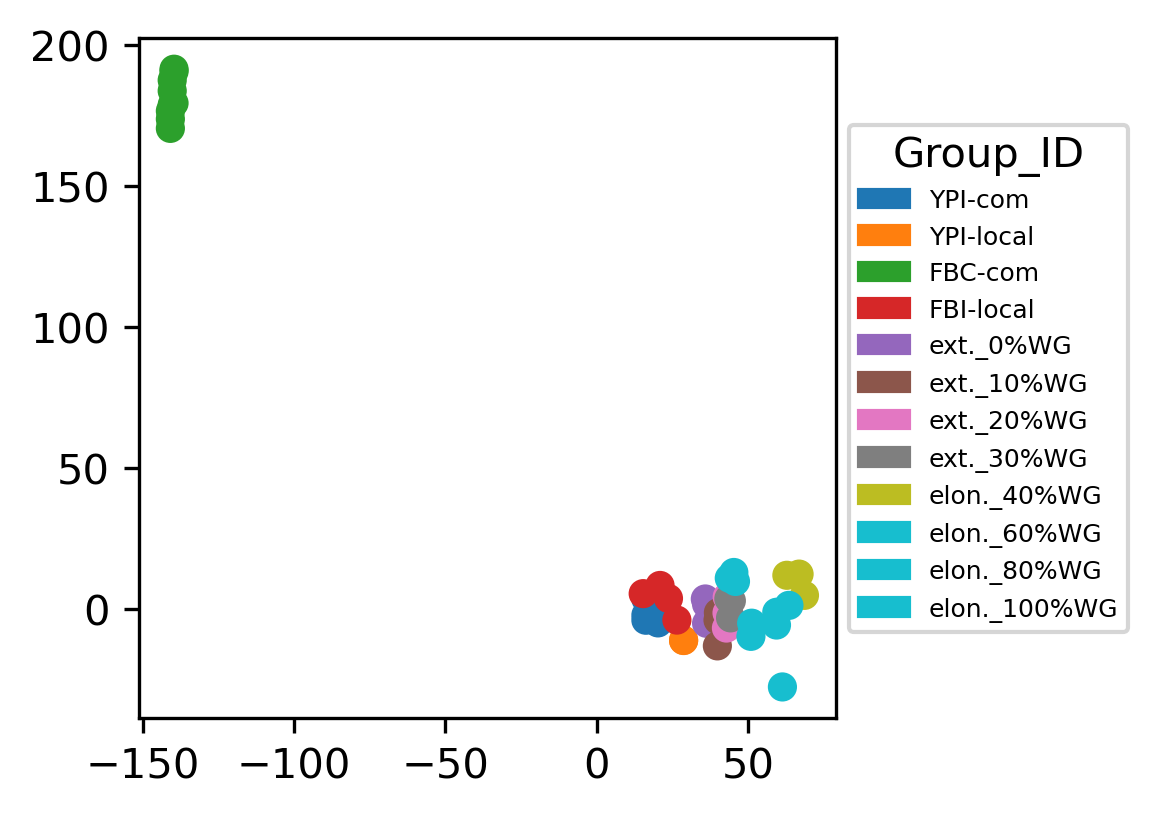

In [74]:
import numpy as np
import statsmodels.api as sm
import pylab as py
from matplotlib.colors import ListedColormap
import seaborn as sns
# np.random generates different random numbers
# whenever the code is executed
# Note: When you execute the same code 
# the graph look different than shown below.
     
colors = ListedColormap(['#F8766D','#00BA38','#619CFF'])

fig = plt.figure(figsize=(3,3), dpi=300)
ax = plt.axes()
scatter = plt.scatter(y=residuals_,x=predictions_,c=labels,cmap=colors,s=20)
ax.legend(*scatter.legend_elements(),title="Study_ID", loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlabel('Predicted Value')
plt.ylabel('residuals')
# plt.scatter(y=residual,x=count, color = 'blue')
# plt.xlabel('sample')
# plt.ylabel('residuals')
plt.show()

fig = plt.figure(figsize=(3,3), dpi=300)
ax = plt.axes()
sm.qqplot(np.array(residuals_), line ='s', ax=ax)
py.show()

fig = plt.figure(figsize=(3,3), dpi=300)
ax = plt.axes()

df = pd.DataFrame(labels2)
df[0] = df[0].astype("category")
import matplotlib.patches

levels, categories = pd.factorize(df[0])
colors = [plt.cm.tab10(i) for i in levels] # using the "tab10" colormap
handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(categories)]

scatter = plt.scatter(y=residuals_,x=predictions_,c=colors)
#plt.gca().set(xlabel='Carat', ylabel='Price', title='Carat vs. Price')
plt.legend(handles=handles,title="Group_ID", loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 6})

#scatter = plt.scatter(y=residuals_,x=predictions_,c=df[0].map(color_map))

#ax.legend(*scatter.legend_elements(),title="Group_ID", loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


   target moisture    fat  protein   carbs     ash  moisture  fiber
0            56.85  6.662  62.6988  20.491  4.2445    5.3937   0.51
1            56.85  6.662  62.6988  20.491  4.2445    5.3937   0.51
2            57.16  6.662  62.6988  20.491  4.2445    5.3937   0.51
3            57.51  6.582  63.1788  19.861  3.9545    5.9137   0.51
4            57.24  6.582  63.1788  19.861  3.9545    5.9137   0.51
   Chewiness
0  38.049816
1  31.294988
2  39.494747
3  26.862429
4  38.977081
[ 5  5  5  6  6  6  7  7  7  8  8  8  9  9  9 10 10 10 11 11 11 12 12 12
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  4  4  4  4]
11


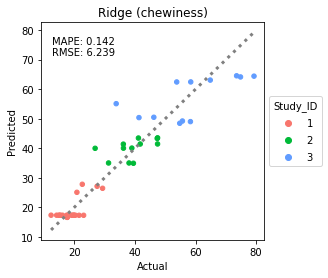

In [75]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeavePGroupsOut
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.feature_selection import f_regression#mutual_info_regression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import itertools
from sklearn.svm import SVR
from matplotlib import pyplot as plt
import numpy as np
import statsmodels.api as sm
import pylab as py
from sklearn.metrics import mean_absolute_percentage_error

data =pd.read_csv('30_12_12_faba_comm_removed.csv',header=0)#print(filtered_data.head())
features_all=data.iloc[:,1:8]
response = 'chewiness'

if response=='crosswise':
    X = np.array(features_all)
elif response=='lengthwise':
    X = np.array(features_all)
elif response=='chewiness':
    X = np.array(features_all)
    y = np.array(data.iloc[:,9:10])
    print(features_all.head())
    print(data.iloc[:,9:10].head())
elif response=='hardness':
    X = np.array(features_all)
    y = np.array(data.iloc[:,8:9])
    print(features_all.head())
    print(data.iloc[:,8:9].head())       
        
y_true, predictions, residuals = list(), list(), list()
loo = LeavePGroupsOut(n_groups=1)
groups = data.iloc[:,10:11].values.ravel()
study_id = data.iloc[:,0]
group_names= data.iloc[:,11:12].values.ravel()
print(groups)
k_fold=loo.get_n_splits(X,groups=groups)
print(k_fold)
grid = dict()
grid['sel__k'] = [i for i in range(1, X.shape[1]+1)]




g_mse, g_mae, g_rmse, g_r2, g_r2adj,g_mape = list(),list(),list(),list(),list(),list()
count=0
predictions_, y_trues_, residuals_ = list(), list(), list()
labels, labels2 = list(), list()
for train_index, test_index in loo.split(X,groups=groups):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    count += 1
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    labels.extend(study_id[test_index])
    labels2.extend(group_names[test_index])

   # scaler = StandardScaler()
   # y_train = scaler.fit_transform(y_train)
   # y_test = scaler.transform(y_test)

    reg = Ridge().fit(X_train, y_train.ravel())
    prediction = reg.predict(X_test)
    predictions_.extend(prediction)
    y_trues_.extend(y_test.ravel())

    residual =  y_test.ravel()-prediction
    residuals_.extend(residual)          


    pred = predictions_
    true = y_trues_



error3 = mean_squared_error(true, pred, squared=False)
error4 = mean_absolute_percentage_error(true, pred)
r2_score_val = r2_score(true, pred)
adj_R2=(1 - (1-r2_score_val)*(len(true)-1)/(len(true)-((7))-1))    


fig, ax = plt.subplots(figsize=(4,4))
plt.text(x=0.05,y=0.85,s='RMSE: %.3f' % error3, transform=ax.transAxes)
plt.text(x=0.05,y=0.90,s='MAPE: %.3f' % error4, transform=ax.transAxes)
#plt.text(x=0.05,y=0.95,s='Adjusted R2: %.3f' % adj_R2, transform=ax.transAxes)
#plt.text(x=0.05,y=0.90,s='R2: %.3f' % r2_score_val, transform=ax.transAxes)


plt.title('Ridge ('+response+')')
#ax.scatter(true, pred,labels)
colors = ListedColormap(['#F8766D','#00BA38','#619CFF'])

scatter=plt.scatter(true, pred,c=labels, cmap=colors,s=20)

true=np.array(true)

ax.plot([true.min(), true.max()], [true.min(), true.max()], linestyle = 'dotted', lw=3, color='gray')
ax.legend(*scatter.legend_elements(),title="Study_ID", loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

plt.show()





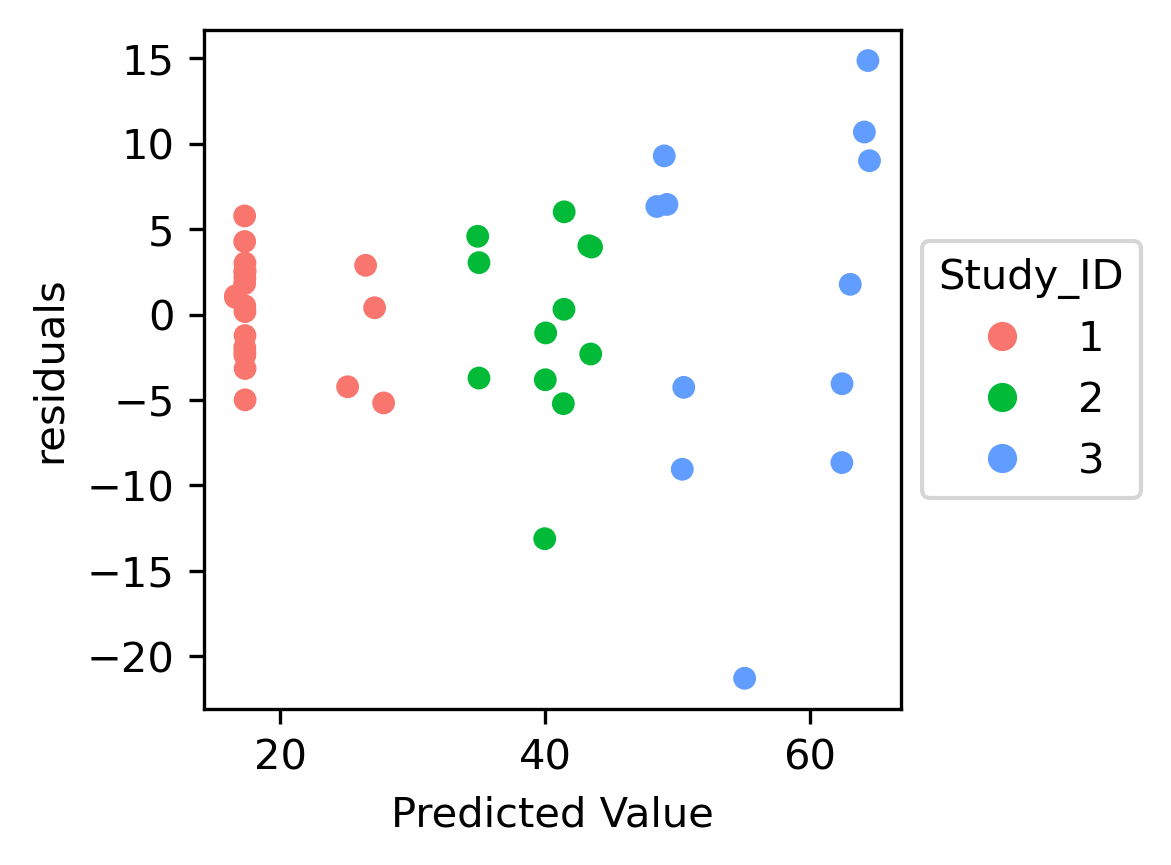

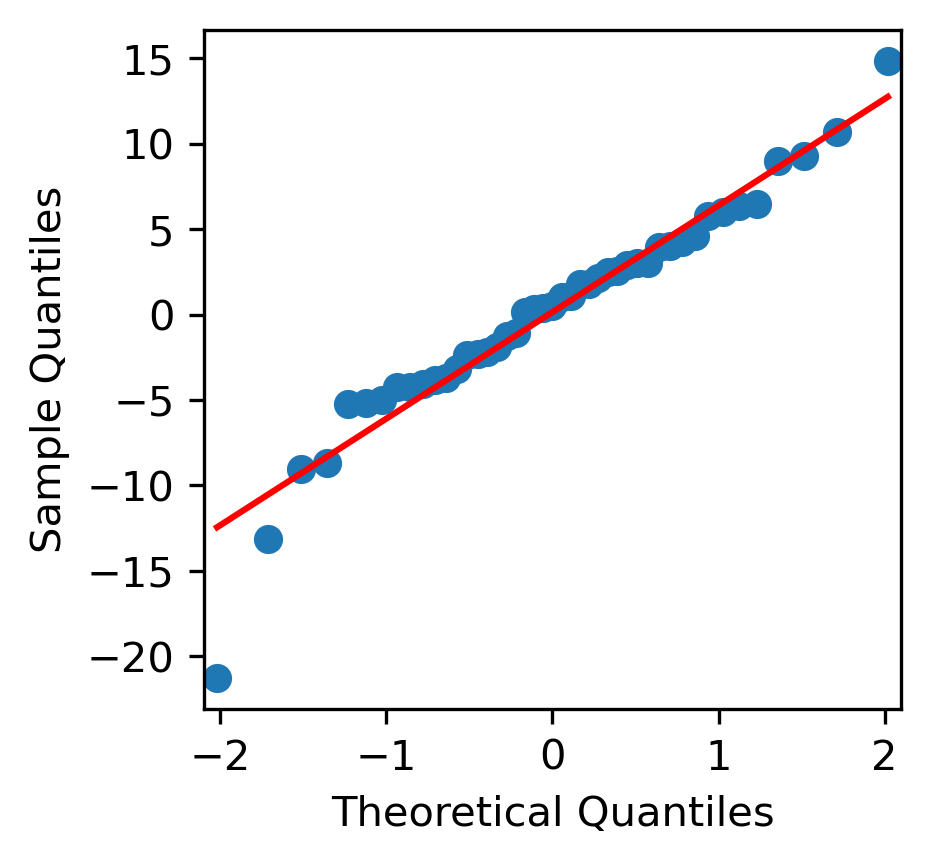

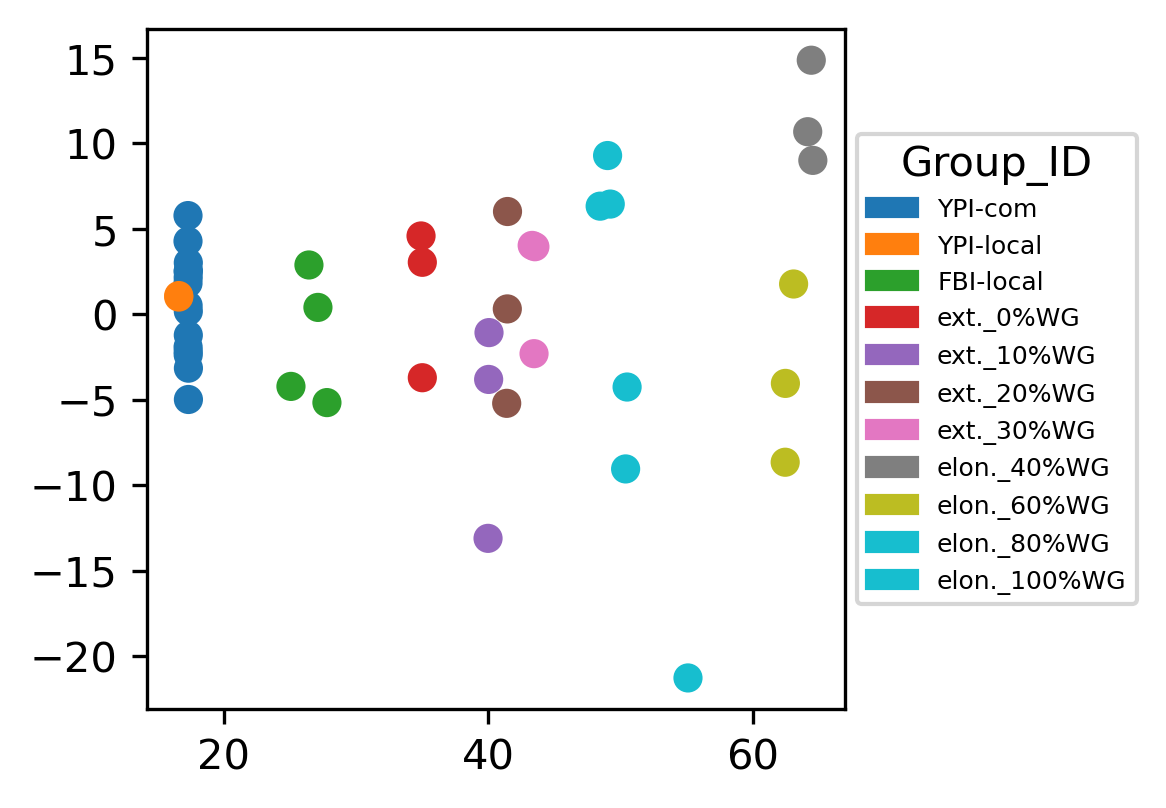

In [76]:
import numpy as np
import statsmodels.api as sm
import pylab as py
from matplotlib.colors import ListedColormap
import seaborn as sns
# np.random generates different random numbers
# whenever the code is executed
# Note: When you execute the same code 
# the graph look different than shown below.
     
colors = ListedColormap(['#F8766D','#00BA38','#619CFF'])

fig = plt.figure(figsize=(3,3), dpi=300)
ax = plt.axes()
scatter = plt.scatter(y=residuals_,x=predictions_,c=labels,cmap=colors,s=20)
ax.legend(*scatter.legend_elements(),title="Study_ID", loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlabel('Predicted Value')
plt.ylabel('residuals')
# plt.scatter(y=residual,x=count, color = 'blue')
# plt.xlabel('sample')
# plt.ylabel('residuals')
plt.show()

fig = plt.figure(figsize=(3,3), dpi=300)
ax = plt.axes()
sm.qqplot(np.array(residuals_), line ='s', ax=ax)
py.show()

fig = plt.figure(figsize=(3,3), dpi=300)
ax = plt.axes()

df = pd.DataFrame(labels2)
df[0] = df[0].astype("category")
import matplotlib.patches

levels, categories = pd.factorize(df[0])
colors = [plt.cm.tab10(i) for i in levels] # using the "tab10" colormap
handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(categories)]

scatter = plt.scatter(y=residuals_,x=predictions_,c=colors)
#plt.gca().set(xlabel='Carat', ylabel='Price', title='Carat vs. Price')
plt.legend(handles=handles,title="Group_ID", loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 6})

#scatter = plt.scatter(y=residuals_,x=predictions_,c=df[0].map(color_map))

#ax.legend(*scatter.legend_elements(),title="Group_ID", loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


In [64]:
np.array(labels2)[np.array(residuals_)>100]

array([3, 3, 3, 3, 3, 3, 3, 3, 3])